In [2]:
import numpy as np

def load_file(filename):
    data = np.loadtxt(filename)
    X = data[:, :-1]
    Y = data[:, -1]
    return X, Y


X, Y = load_file("titanic-data/titanic-train.txt")
print("Loaded", X.shape, "feature vectors")


Loaded (710, 6) feature vectors


## **_Gradient Descent for Logistic Regression_**
**logreg_inference** is the function that given **x**,**w** and **b** returns the probability (logit function)

$$ \hat{P}=\frac {1}{1+e^{-z}} $$
$$ z= b + w_1x_1 + w_1x_1 + .... + w_nx_n $$


**logreg_trains** is the function that apply the gradient descent and return the parameters :
   $$ b^{i+1}= b^i -\frac{\eta}{m}\sum_{i=0}^{m-1}(\hat{p_i}-y_i) $$
   $$ w^{i+1}= w^i -\eta(\frac{1}{m}X^T(\hat{P}-Y)) $$

**cross_entropy** calculate the cross-entropy
   $$ \sum_{i=0}^{n-1} -y_i\log{\hat{p_i}}-(1-y_i)\log{(1-\hat{p_i})}$$



In [3]:
import numpy as np
import matplotlib.pyplot as plt


def logreg_inference(X, w, b):
    z = X @ w + b
    p = 1 / (1 + np.exp(-z))
    return p

def cross_entropy(P, Y):
    P = np.clip(P, 0.0001, 0.9999)
    return (-Y * np.log(P) - (1 - Y) * np.log(1-P)).mean()

def logreg_train(X, Y, steps, lr):
    m, n = X.shape
    w = np.zeros(n)
    b = 0
    accs = []
    losses = []
    for step in range(steps):
        P = logreg_inference(X, w, b)
        if step % 1000 == 0:
            loss = cross_entropy(P, Y)
            prediction = (P > 0.5)
            accuracy = (prediction == Y).mean()
            accs.append(accuracy)
            losses.append(loss)
        grad_w = ((P - Y) @ X) / m 
        grad_b = (P - Y).mean()
        w -= lr * grad_w
        b -= lr * grad_b
    return w, b, accs, losses


# 1. Train a model

#### 1.1 Which is a good value for the learning rate?

/tmp/ipykernel_29912/3388168791.py:7: RuntimeWarning: overflow encountered in exp
  p = 1 / (1 + np.exp(-z))


0.001

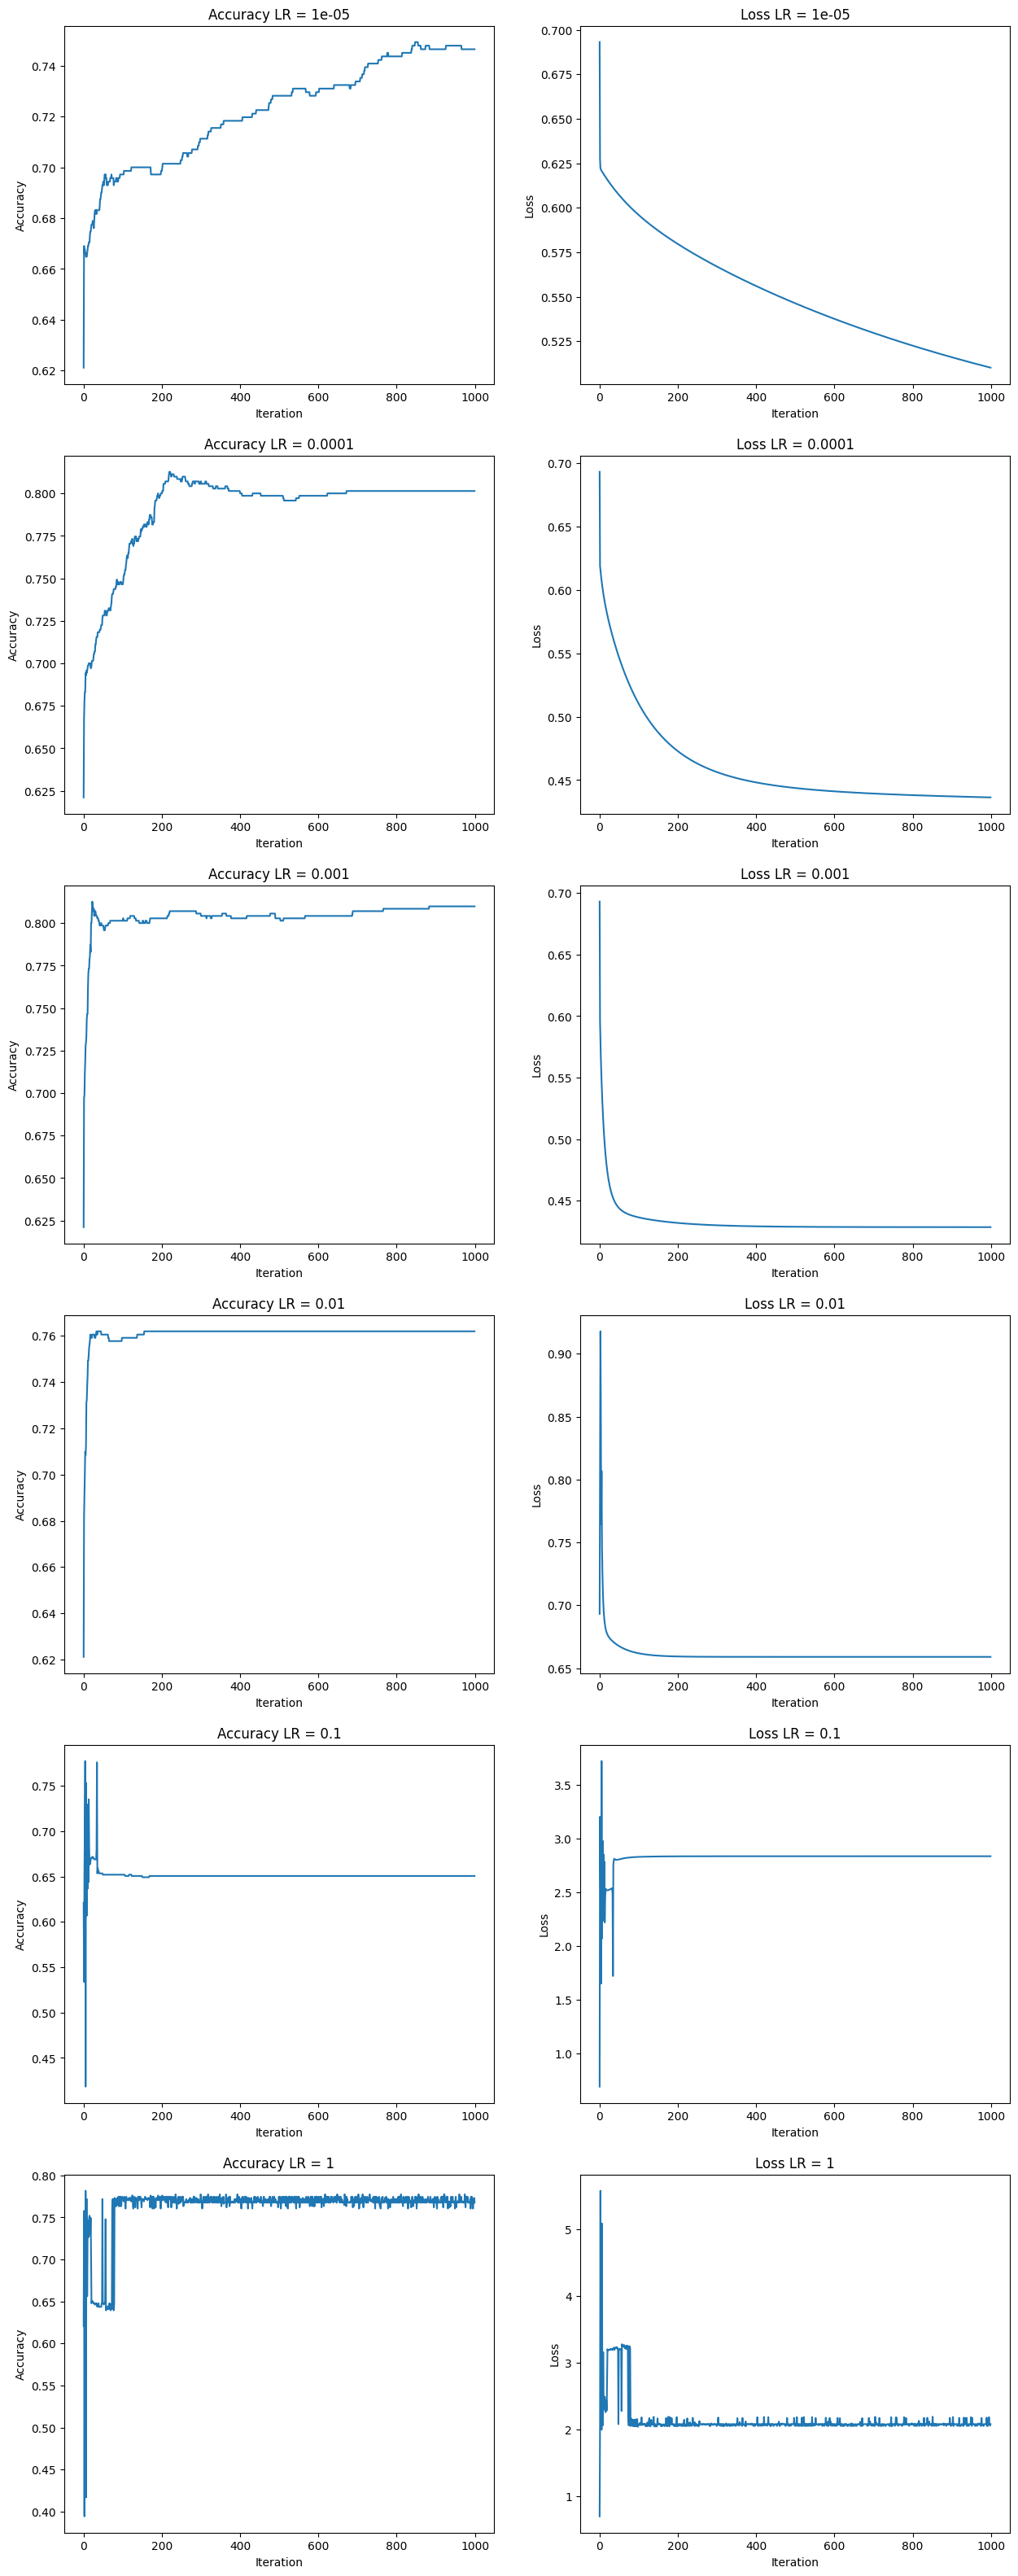

In [4]:
learning_rates = []
result_accuracy = []
fig, axs = plt.subplots(6, 2, figsize=(15, 40))
for i in range(-5, 1):
    learning_rate = 10 ** i
    w, b, accuracies, losses = logreg_train(X, Y, 1000000, learning_rate)
    learning_rates.append(learning_rate)
    result_accuracy.append(accuracies[-1])
    axs[i+5, 0].plot(accuracies)
    axs[i+5, 0].set_title("Accuracy LR = " +
                          str(learning_rate))
    axs[i+5, 0].set_xlabel('Iteration')
    axs[i+5, 0].set_ylabel('Accuracy')

    axs[i+5, 1].plot(losses)
    axs[i+5, 1].set_title("Loss LR = " +
                          str(learning_rate))
    axs[i+5, 1].set_xlabel('Iteration')
    axs[i+5, 1].set_ylabel('Loss')
    
best_lr = learning_rates[result_accuracy.index(max(result_accuracy))]
best_lr


#### 1.2 How many iterations are required to converge?

Text(0, 0.5, 'Loss')

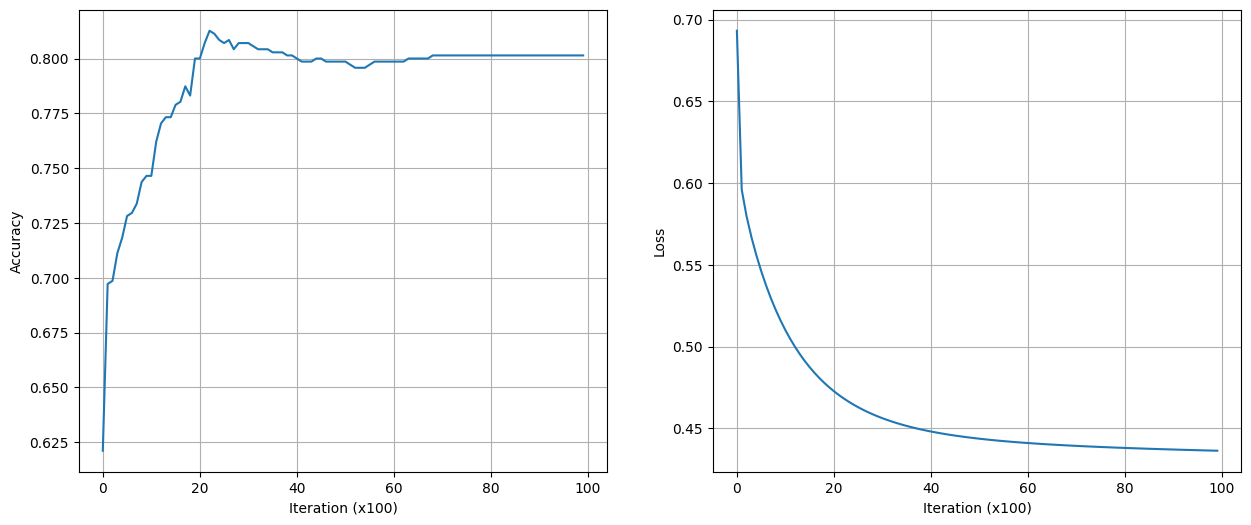

In [5]:
w, b, accuracies1, losses = logreg_train(X, Y, 100000, best_lr)

fig, axs = plt.subplots(1, 2, figsize=(15, 6))
axs[0].plot(accuracies1)
axs[0].grid(visible=True)
axs[0].set_xlabel('Iteration (x100)')
axs[0].set_ylabel('Accuracy')

axs[1].plot(losses)
axs[1].grid(visible=True)
axs[1].set_xlabel('Iteration (x100)')
axs[1].set_ylabel('Loss')


# 2. Analyze the model

#### 2.1. what would be your probability to survive? (Make a guess about the ticket class, the fare etc.)

In [6]:
my_info = [1, 0, 24, 1, 0, 91]
my_prob_to_survive = logreg_inference(my_info, w, b) * 100
print("My probability to survive : ",my_prob_to_survive)


My probability to survive :  42.75377198575263


#### 2.2. What is the training accuracy of the trained model?

In [7]:
print('Train accuracy : ', accuracies1[-1] * 100)

Train accuracy :  80.14084507042254


#### 2.3. Looking at the learned weights, how the individual features influence the probability of surviving?

[-0.79789356  2.67170526 -0.02611926 -0.28575255 -0.09190851  0.00533742]


Text(0, 0.5, 'Weight')

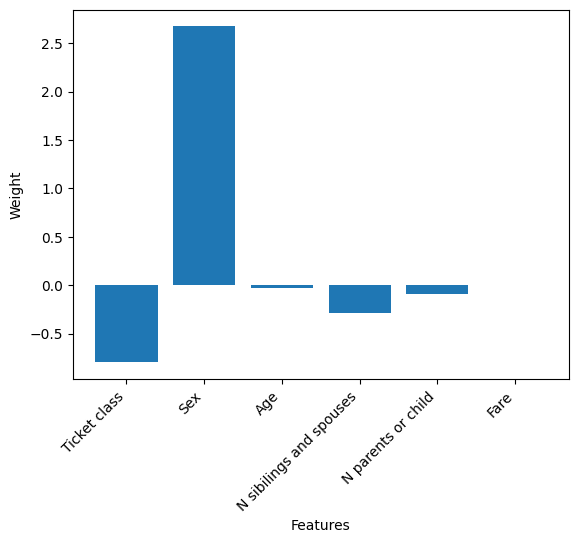

In [8]:
import matplotlib.pyplot as plt
features = ['Ticket class', 'Sex', 'Age',
            'N sibilings and spouses', 'N parents or child', 'Fare']
print(w)
plt.bar(features, w)
plt.xticks(rotation=45, ha="right")
plt.xlabel('Features')
plt.ylabel('Weight')


#### 2.5. Draw a scatter plot showing the distribution of the two classes in the plane defined by the two most influential features. Comment the plot.

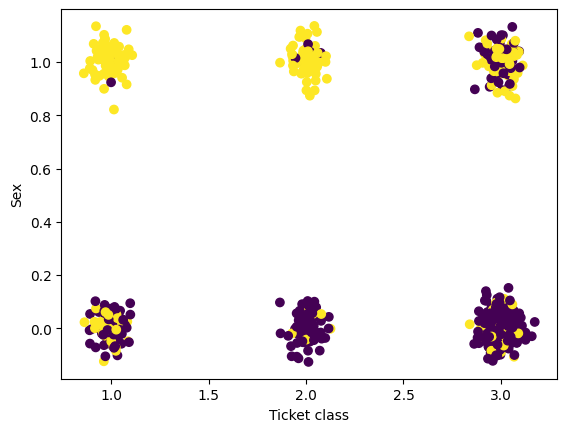

In [9]:
Xrnd = X + np.random.randn(X.shape[0], X.shape[1]) / 20
plt.scatter(Xrnd[:, 0], Xrnd[:, 1], c=Y)
plt.xlabel("Ticket class")
plt.ylabel("Sex")
plt.show()


# 3. Evaluate the model

#### 3.1. what is the test accuracy of the model?

In [10]:
X, Y = load_file('titanic-data/titanic-test.txt')
P = logreg_inference(X, w, b)
predictions = (P > 0.5)
accuracy = (Y == predictions).mean()
print("Test accuracy:", accuracy * 100)


Test accuracy: 79.09604519774011
